In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = 'Capstone1_Data'
filepath1 = os.path.join('..', path,'dataframe.csv') #if file is not in same dir as notebook, must change path
filepath2 = os.path.join('..', path,'dataframe_all_timestamps.csv') #if file is not in same dir as notebook, must change path

df = pd.read_csv(filepath1)
df_all_timestamps = pd.read_csv(filepath2)

In [3]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)


#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [4]:
#optional
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57,9.877554,7.375882,3.178054,5.375278
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18,9.940061,6.940222,6.326149,5.497168
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08,12.242660,7.255591,5.003946,4.510860
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33,9.674074,4.962845,2.397895,2.079442
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26,11.518987,7.056175,3.891820,3.583519


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 24 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [7]:
# top100cat_df = num_top100_by_category.to_frame(name='Counts').reset_index() - make into dataframe
# df_loglikes = df.sort_values(by=['log_likes'], ascending=False) - sort
# num_top100_by_country = top_video_like['country'].value_counts() - count

#boxplot
# plt.figure(figsize = (10,10))
#sns.boxplot(x = "country", y = 'log_views', data = df)

# sns bar chart
# ax = sns.countplot(y="category", data=GB_df[0:100], palette="Set3")

# GB_df = df[df['country'].isin(['GB'])][['country','video_id','title', 'channel_title','category','log_views','log_likes','log_dislikes','log_comment_count']]
# GB_df

#histogram
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
auto_prices['engine-size'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of auto engine size') # Give the plot a main title
ax.set_xlabel('Engine size') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

In [8]:
df['country'].value_counts() 

RU    30783
MX    27900
FR    24085
DE    22965
CA    17338
IN    15222
KR    13793
JP    10808
US     5185
GB     3070
Name: country, dtype: int64

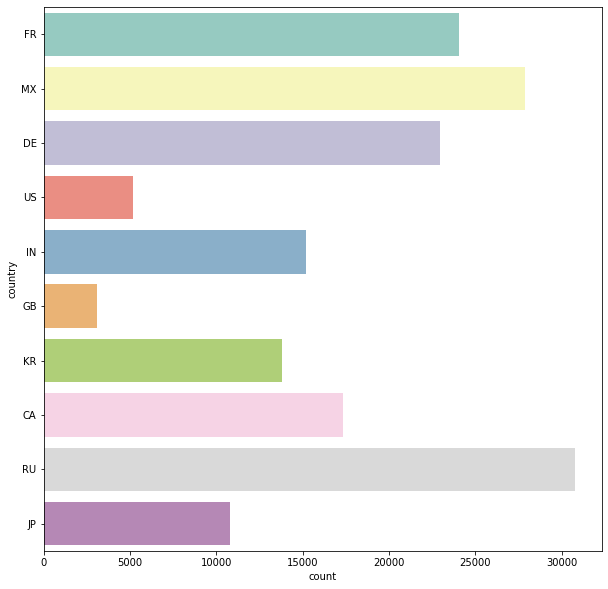

In [9]:
#Top Content producers are RU, MX, FR 
#Number of videos by country
fig = plt.figure(figsize=(10,10))
ax = sns.countplot(y="country", data=df, palette="Set3")

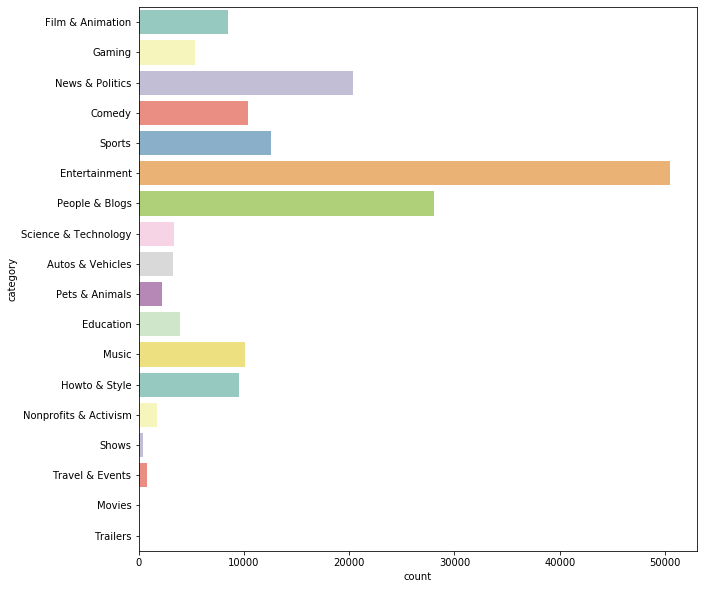

In [10]:
# Top Categories are Entertainment, People & Blogs, News & Politics
# Number of videos by category
fig = plt.figure(figsize=(10,10))
ax = sns.countplot(y="category", data=df, palette="Set3")

In [11]:
ENG_df = df[df['country'].isin(['GB', 'US', 'CA'])][['country','video_id','trending_date','title', 'tags', 'channel_title','category','log_views','log_likes','log_dislikes','log_comment_count']]
ENG_df

,country,video_id,trending_date,title,tags,channel_title,category,log_views,log_likes,log_dislikes,log_comment_count
310,US,o78x918zbFk,2017-11-14,TOTAL FAIL! NATASHA DENONA HOLIDAY WTF,"YouTube|""Beauty""|""Makeup""|""Tutorial""|""Review""|...",Tati,Howto & Style,14.060310,10.948488,7.672758,10.139626
311,US,6ixU_vdE0Es,2017-11-14,BOYFRIEND DOES MY MAKEUP | Madelaine Petsch,"madelaine|""madelainepetsch""|""madelaine petsch""...",Madelaine Petsch,People & Blogs,12.542781,9.917883,3.663562,6.845880
312,US,wRGldR_SQAA,2017-11-14,Apple Clips sample,[none],Steve Kovach,People & Blogs,7.723120,0.000000,0.000000,0.000000
313,US,agKDPntMv-E,2017-11-14,Stephen A. Smith slams the Philadelphia 76ers ...,"espn|""espn live""|""first take""|""first take espn...",ESPN,Sports,13.060896,8.303505,6.066108,7.348588
314,US,Xl38SuxyrgM,2017-11-14,"STEPH CURRY and OMRI CASSPI, postgame GSW (9-3...","DubNation|""Golden State Warriors""|""Golden Stat...",LetsGoWarriors,Sports,9.699288,4.997212,2.639057,3.871201
...,...,...,...,...,...,...,...,...,...,...,...
170802,CA,VZn6G0M9wNs,2018-06-14,Brain On Fire | Official Trailer [HD] | Netflix,"Netflix|""Trailer""|""Netflix Original Series""|""N...",Netflix,Entertainment,11.549518,8.452761,4.574711,5.746203
170803,CA,HPegJlGLE2I,2018-06-14,LaVar Ball on chances LeBron James joins Lonzo...,"fox|""fox sports""|""fs1""|""fox sports 1""|""undispu...",Skip and Shannon: UNDISPUTED,Sports,14.066997,9.762615,7.431892,8.866300
170804,CA,Q1oGvWctQ1E,2018-06-14,5 Watermelon Gadgets put to the Test,"Watermelon Gadgets|""watermelon slicer""|""Gadget...",CrazyRussianHacker,Science & Technology,13.324002,9.788638,6.400257,7.459915
170805,CA,RwFNYOxCS3s,2018-06-14,Funniest YEARBOOK QUOTES Ever,"azzyland|""azzy""|""reaction""|""reacting""|""funny""|...",AzzyLand,Entertainment,12.476619,9.781489,5.236442,8.323366


In [12]:
ENG_df = df[df['country'].isin(['GB', 'US', 'CA'])][['country','video_id','trending_date','title', 'tags', 'channel_title','category','log_views','log_likes','log_dislikes','log_comment_count']]
ENG_df

,country,video_id,trending_date,title,tags,channel_title,category,log_views,log_likes,log_dislikes,log_comment_count
310,US,o78x918zbFk,2017-11-14,TOTAL FAIL! NATASHA DENONA HOLIDAY WTF,"YouTube|""Beauty""|""Makeup""|""Tutorial""|""Review""|...",Tati,Howto & Style,14.060310,10.948488,7.672758,10.139626
311,US,6ixU_vdE0Es,2017-11-14,BOYFRIEND DOES MY MAKEUP | Madelaine Petsch,"madelaine|""madelainepetsch""|""madelaine petsch""...",Madelaine Petsch,People & Blogs,12.542781,9.917883,3.663562,6.845880
312,US,wRGldR_SQAA,2017-11-14,Apple Clips sample,[none],Steve Kovach,People & Blogs,7.723120,0.000000,0.000000,0.000000
313,US,agKDPntMv-E,2017-11-14,Stephen A. Smith slams the Philadelphia 76ers ...,"espn|""espn live""|""first take""|""first take espn...",ESPN,Sports,13.060896,8.303505,6.066108,7.348588
314,US,Xl38SuxyrgM,2017-11-14,"STEPH CURRY and OMRI CASSPI, postgame GSW (9-3...","DubNation|""Golden State Warriors""|""Golden Stat...",LetsGoWarriors,Sports,9.699288,4.997212,2.639057,3.871201
...,...,...,...,...,...,...,...,...,...,...,...
170802,CA,VZn6G0M9wNs,2018-06-14,Brain On Fire | Official Trailer [HD] | Netflix,"Netflix|""Trailer""|""Netflix Original Series""|""N...",Netflix,Entertainment,11.549518,8.452761,4.574711,5.746203
170803,CA,HPegJlGLE2I,2018-06-14,LaVar Ball on chances LeBron James joins Lonzo...,"fox|""fox sports""|""fs1""|""fox sports 1""|""undispu...",Skip and Shannon: UNDISPUTED,Sports,14.066997,9.762615,7.431892,8.866300
170804,CA,Q1oGvWctQ1E,2018-06-14,5 Watermelon Gadgets put to the Test,"Watermelon Gadgets|""watermelon slicer""|""Gadget...",CrazyRussianHacker,Science & Technology,13.324002,9.788638,6.400257,7.459915
170805,CA,RwFNYOxCS3s,2018-06-14,Funniest YEARBOOK QUOTES Ever,"azzyland|""azzy""|""reaction""|""reacting""|""funny""|...",AzzyLand,Entertainment,12.476619,9.781489,5.236442,8.323366


In [35]:
ENG_df_cat = ENG_df['category'].value_counts()




In [40]:
fig = plt.figure(figsize=(10,10))
ax = sns.barplot(x="category", y="log_views", data=ENG_df")

SyntaxError: EOL while scanning string literal (<ipython-input-40-3442f5840f92>, line 2)

In [25]:
GB_df_views = df[df['country'].isin(['GB'])]
GB_df_views.sort_values(by=['log_views'], ascending=False)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count
119441,_I_D_8Z4sJE,2018-04-07,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,Music,2018-03-02,05:00:19,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",424538912,2818771,149275,99380,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,GB,2018-03-02 05:00:19,19.866514,14.851812,11.913552,11.506716
149316,9jI-z9QN6g8,2018-05-18,"Te Bote Remix - Casper, Nio García, Darell, Ni...",Flow La Movie,10,Music,2018-04-11,22:00:00,"Te Bote|""Te Bote Remix""|""Flow La Movie""|""Ozuna...",337621571,2581961,166549,113564,https://i.ytimg.com/vi/9jI-z9QN6g8/default.jpg,False,False,False,Flow La Movie Presenta - Te Boté Remix - Caspe...,GB,2018-04-11 22:00:00,19.637436,14.764060,12.023051,11.640131
105767,kLpH1nSLJSs,2018-03-23,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,10,Music,2018-02-15,00:00:03,"Bad|""Bunny""|""Bad Bunny""|""Video Oficial""|""Music...",328860380,3823879,215530,225216,https://i.ytimg.com/vi/kLpH1nSLJSs/default.jpg,False,False,False,Bad Bunny - Amorfoda | Video Oficial\n\n-Click...,GB,2018-02-15 00:00:03,19.611144,15.156776,12.280860,12.324820
86795,wfWkmURBNv8,2018-03-01,Ozuna x Romeo Santos - El Farsante Remix,Ozuna,10,Music,2018-01-30,15:00:05,"Ozuna|""Reggaeton""|""Odisea""|""Odisea The Album""|...",288811992,1618180,151147,67506,https://i.ytimg.com/vi/wfWkmURBNv8/default.jpg,False,False,False,DESCARGA Odisea Aqui: http://apple.co/2vX00sT\...,GB,2018-01-30 15:00:05,19.481286,14.296813,11.926015,11.119987
167397,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,Music,2018-05-06,04:00:07,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",259721696,5444541,379862,553371,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,GB,2018-05-06 04:00:07,19.375121,15.510124,12.847566,13.223786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31878,NXin9D2Nc10,2017-12-23,Scarlets VS Benetton. Highlights GAME Champion...,Fahd W Rugby,17,Sports,2017-12-09,21:49:00,"Scarlets|""Benetton""|""Champions Cup""",2881,9,0,0,https://i.ytimg.com/vi/NXin9D2Nc10/default.jpg,False,False,False,Scarlets 33 - 28 Benetton Highlights GAME Cham...,GB,2017-12-09 21:49:00,7.966240,2.302585,0.000000,0.000000
2961,au3S8F08v54,2017-11-17,New album Open Here out 2nd February,Field Music,10,Music,2017-11-07,10:04:31,"newmusic|""indie""|""bbc6music""|""alternative""|""Fi...",2254,45,0,9,https://i.ytimg.com/vi/au3S8F08v54/default.jpg,False,False,False,"Preorder 'Open Here' on transparent 180g LP, ...",GB,2017-11-07 10:04:31,7.720905,3.828641,0.000000,2.302585
6902,NcVxrr_q3Hw,2017-11-22,George Durack | Remembrance Sunday | You Can't...,Official Jeremy Corbyn Channel,26,Howto & Style,2017-11-12,07:37:46,[none],1583,90,12,37,https://i.ytimg.com/vi/NcVxrr_q3Hw/default.jpg,False,False,False,"Ahead of Remembrance Sunday, I visited my frie...",GB,2017-11-12 07:37:46,7.367709,4.510860,2.564949,3.637586
22626,vPsic3dEndc,2017-12-12,QUIZ : Name the Trail : A Christmas Cracker,The 2Inch of Gnar,22,People & Blogs,2017-12-01,11:34:30,"MTB|""Mountain Biking""|""Bike""|""Bird""|""Aeris""|""B...",1228,2,0,1,https://i.ytimg.com/vi/vPsic3dEndc/default.jpg,False,False,False,A Bad Brains Christmas Cracker! - #NameTheTrai...,GB,2017-12-01 11:34:30,7.113956,1.098612,0.000000,0.693147


In [18]:
US_df_views = df[df['country'].isin(['US'])]
US_df_views = US_df_views.sort_values(by=['log_views'], ascending=False)
US_df_views[0:100]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count
107016,-BQJo3vK8O8,2018-03-25,Maluma - El Préstamo (Official Video),MalumaVEVO,10,Music,2018-03-09,11:00:01,"Maluma Music|""Maluma Official Video""|""Maluma V...",87264467,815369,71494,35945,https://i.ytimg.com/vi/-BQJo3vK8O8/default.jpg,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...,US,2018-03-09 11:00:01,18.284454,13.611397,11.177383,10.489773
146563,u9Mv98Gr5pY,2018-05-14,VENOM - Official Trailer (HD),Sony Pictures Entertainment,24,Entertainment,2018-04-24,03:45:03,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",59254638,1295189,47162,139879,https://i.ytimg.com/vi/u9Mv98Gr5pY/default.jpg,False,False,False,We Are #Venom. 10.5.18One of Marvel's most eni...,US,2018-04-24 03:45:03,17.897355,14.074168,10.761365,11.848540
166508,ulNswX3If6U,2018-06-09,Selena Gomez - Back To You (Lyric Video),Selena Gomez,1,Film & Animation,2018-05-10,16:00:11,"selena gomez|""13 reasons why""|""back to you""|""s...",54863912,922355,18037,41774,https://i.ytimg.com/vi/ulNswX3If6U/default.jpg,False,False,False,"Get 'Back To You,' out now: http://smarturl.it...",US,2018-05-10 16:00:11,17.820366,13.734687,9.800236,10.640053
22112,_9YMpuLDnwo,2017-12-11,42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE,5-Minute Crafts,26,Howto & Style,2017-12-03,08:30:00,"5-Minute Crafts|""DIY""|""Do it yourself""|""crafts...",54155921,378111,66632,24679,https://i.ytimg.com/vi/_9YMpuLDnwo/default.jpg,False,False,False,Subscribe to 5-Minute Crafts KIDS: https://goo...,US,2017-12-03 08:30:00,17.807378,12.842946,11.106955,10.113748
146586,rRr1qiJRsXk,2018-05-14,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,24,Entertainment,2018-04-24,07:58:08,"Sanju Teaser|""Official Teaser""|""Sanju Official...",48654951,811144,33051,48941,https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,False,False,False,Few lives in our times are as dramatic and eni...,US,2018-04-24 07:58:08,17.700264,13.606202,10.405837,10.798391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106771,sIMChzE_aCo,2018-03-24,"SICARIO, Day of the Soldado - Official Trailer...",Sony Pictures Entertainment,24,Entertainment,2018-03-20,00:00:41,"Sony|""Sony Pictures""|""Sicario""|""Sicario: Day o...",9572037,19001,856,2133,https://i.ytimg.com/vi/sIMChzE_aCo/default.jpg,False,False,False,Luck doesn’t live on this side of the border. ...,US,2018-03-20 00:00:41,16.074357,9.852300,6.753438,7.665753
63657,CxGUmtRLm5g,2018-02-02,Budweiser 2018 Super Bowl Commercial | “Stand ...,Budweiser,24,Entertainment,2018-01-26,13:23:59,"budweiser|""stand by you""|""super bowl""|""water""|...",9293828,20467,5000,3240,https://i.ytimg.com/vi/CxGUmtRLm5g/default.jpg,False,False,False,"Since 1988, our employees have helped provide ...",US,2018-01-26 13:23:59,16.044861,9.926618,8.517393,8.083637
146646,KONe4SNFA64,2018-05-14,Rihanna's Epic 10-Minute Guide to Going Out Ma...,Vogue,26,Howto & Style,2018-05-03,11:00:09,"beauty|""beauty secrets""|""celebrity""|""how to""|""...",9233435,605954,5722,26319,https://i.ytimg.com/vi/KONe4SNFA64/default.jpg,False,False,False,"In this video makeup tutorial, Rihanna gets re...",US,2018-05-03 11:00:09,16.038342,13.314561,8.652248,10.178084
94285,r-i6XpcL1Fs,2018-03-09,Exercise Ball Magnus Effect from 200m!!,How Ridiculous,17,Sports,2018-02-23,22:00:02,"how ridiculous|""anvil vs""|""basketball""|""magnus...",9220058,109125,33223,23799,https://i.ytimg.com/vi/r-i6XpcL1Fs/default.jpg,False,False,False,How good is back spin.\nSUBSCRIBE ➤ http://bit...,US,2018-02-23 22:00:02,16.036892,11.600258,10.411028,10.077441


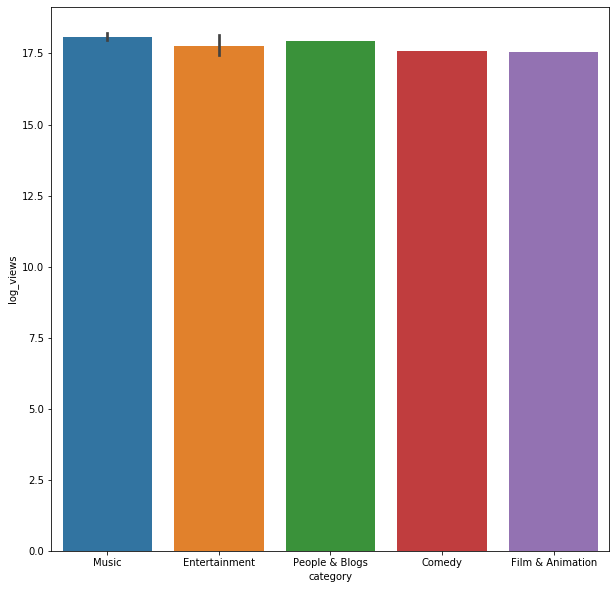

In [24]:
GB_df_views = df[df['country'].isin(['GB'])]
GB_df_views = GB_df_views.sort_values(by=['log_views'], ascending=False)
GB_df_views = GB_df_views[0:100]

fig = plt.figure(figsize=(10,10))
ax = sns.barplot(x="category", y="log_views", data=GB_df_views)

In [20]:
CA_df_views = df[df['country'].isin(['CA'])]
CA_df_views = CA_df_views.sort_values(by=['log_views'], ascending=False)
CA_df_views[0:100]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count
124022,DPxL7dO5XPc,2018-04-19,Lil Pump - ESSKEETIT (Official Music Video),Lil pump,10,Music,2018-04-13,03:59:40,"lilpump|""esskeetit""|""esskeetitmusicvideo""|""esk...",40671623,1696151,147891,187580,https://i.ytimg.com/vi/DPxL7dO5XPc/default.jpg,False,False,False,Get ESSKEETIT here: https://ad.gt/esskeetit\n\...,CA,2018-04-13 03:59:40,17.521041,14.343873,11.904238,12.141966
146109,32sYGCOYJUM,2018-05-14,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,10,Music,2018-05-11,17:00:47,"chạy ngay đi mv|""chạy ngay đi""|""chay ngay di m...",29662624,827026,135931,445251,https://i.ytimg.com/vi/32sYGCOYJUM/default.jpg,False,False,False,#ChayNgayDi #RunNow #เรียกใช้เดี๋ยวนี้ #MTPEnt...,CA,2018-05-11 17:00:47,17.205398,13.625593,11.819910,13.006396
109913,D86RtevtfrA,2018-03-28,Deadpool 2 | The Trailer,20th Century Fox,1,Film & Animation,2018-03-22,12:59:16,"Trailer|""Deadpool""|""20th Century Fox (Producti...",27260320,532660,12587,28161,https://i.ytimg.com/vi/D86RtevtfrA/default.jpg,False,False,False,"After surviving a near fatal bovine attack, a ...",CA,2018-03-22 12:59:16,17.120943,13.185640,9.440499,10.245729
17436,8qs2dZO6wcc,2017-12-05,Naah - Harrdy Sandhu Feat. Nora Fatehi | Jaan...,Sony Music India,10,Music,2017-11-30,09:33:03,"Sony Music India|""Sony Music""|""Latest Hits""|""H...",24310254,292227,10274,12429,https://i.ytimg.com/vi/8qs2dZO6wcc/default.jpg,False,False,False,"After the success of “Backbone” , the team is ...",CA,2017-11-30 09:33:03,17.006409,12.585290,9.237469,9.427868
28595,-K9ujx8vO_A,2017-12-19,PADMAN Official Trailer | Akshay Kumar | Sonam...,Sony Pictures India,24,Entertainment,2017-12-15,05:27:25,"Pad Man Official Trailer|""Pad Man Trailer""|""Ak...",24065621,404788,22557,26631,https://i.ytimg.com/vi/-K9ujx8vO_A/default.jpg,False,False,False,Superhero hai yeh Pagla! Here's the Pad Man Tr...,CA,2017-12-15 05:27:25,16.996295,12.911121,10.023845,10.189869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123795,DoGE_cD37wc,2018-04-18,बाली उम्र में गलती | Bali Umar Mein Galti | Ne...,FWF Indian Movies,1,Film & Animation,2018-04-17,15:39:22,"Bollywood Full Movies|""Hollywood Full Movies""|...",6201167,18914,7074,1710,https://i.ytimg.com/vi/DoGE_cD37wc/default.jpg,False,False,False,फुल मूवी देखने के लिए इस लिंक पर क्लिक करे : h...,CA,2018-04-17 15:39:22,15.640248,9.847711,8.864323,7.444833
59420,UUlS7BuYddA,2018-01-27,Pant Mein Gun | Sonakshi Sinha | Diljit Dosanj...,PoojaEntertainment,24,Entertainment,2018-01-25,17:14:58,"bollywood music|""Welcome to New York""|""Sonaksh...",6199950,8304,791,402,https://i.ytimg.com/vi/UUlS7BuYddA/default.jpg,False,False,False,The song that will make you want to dance your...,CA,2018-01-25 17:14:58,15.640052,9.024613,6.674561,5.998937
166629,x0qZDZAq36U,2018-06-09,Afghanistan vs Bangladesh Highlights || 3rd T2...,Rabbitholebd Sports,17,Sports,2018-06-07,19:44:14,Afghanistan vs Bangladesh Highlights || 3rd T2...,6174723,35894,4472,6278,https://i.ytimg.com/vi/x0qZDZAq36U/default.jpg,False,False,False,Afghanistan vs Bangladesh Highlights || 3rd T2...,CA,2018-06-07 19:44:14,15.635975,10.488353,8.405815,8.744966
153978,dxVXerqLKw4,2018-05-24,FULL CEREMONY: Prince Harry and Meghan Markle ...,FOX 10 Phoenix,25,News & Politics,2018-05-19,12:29:30,"Royal Wedding|""#RoyalWedding""|""Royal Wedding c...",6140764,37423,6078,8999,https://i.ytimg.com/vi/dxVXerqLKw4/default.jpg,False,False,False,You're invited to the Royal Wedding! LIVE stre...,CA,2018-05-19 12:29:30,15.630460,10.530067,8.712595,9.104980


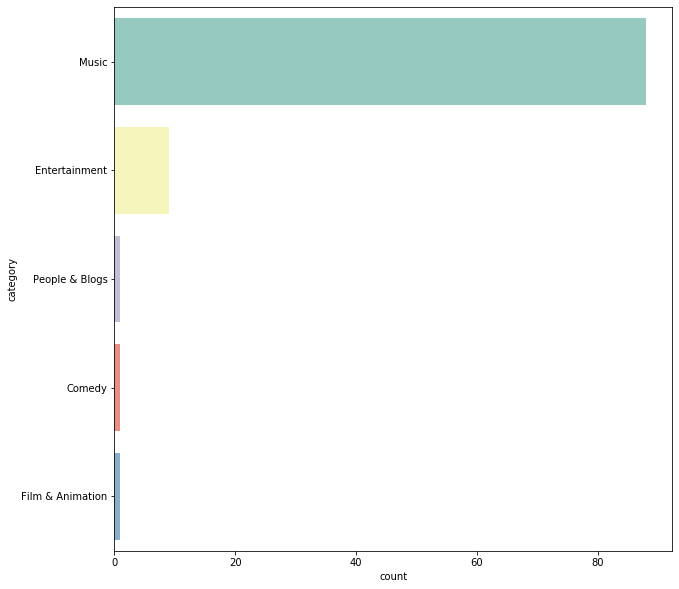

In [23]:
#Most views
fig = plt.figure(figsize=(10,10))
ax = sns.countplot(y="category", data=GB_df_views, palette="Set3")

In [ ]:
# Most views sort videos
GB_df_views = GB_df.sort_values(by=['log_views'], ascending=False)

In [ ]:
#Top 100 videos by categories 
GBtop100 = GB_df_views[0:100]
GBtop100
fig = plt.figure(figsize=(10,10))
ax = sns.countplot(y="category", data=GBtop100, palette="Set3")

In [ ]:
#GB activity - Log Likes by Category
plt.figure(figsize = (10,10))
sns.boxplot(y = "category", x = 'log_likes', data = GB_df)
#TOP CATEGORIES - music, entertainment, film & animation, how to, comedy, scitech

In [ ]:
#GB activity - Log Dislikes by Category
plt.figure(figsize = (10,10))
sns.boxplot(y = "category", x = 'log_dislikes', data = GB_df)
#TOP CATEGORIES - music, entertainment, film & animation, how to, comedy, scitech

In [ ]:
#GB activity - Comment_Counts by Category
plt.figure(figsize = (10,10))
sns.boxplot(y = "category", x = 'log_comment_count', data = GB_df)
#TOP CATEGORIES - music, entertainment, film & animation, how to, comedy, scitech

In [ ]:
GB_channel = GB_df['channel_title'].value_counts()
GB_channel[0:10]

In [ ]:
GB_ent_df = GB_df[GB_df['category'].isin(['Entertainment'])][['video_id','trending_date','title', 'tags', 'channel_title','category','log_views','log_likes','log_dislikes','log_comment_count']]

In [ ]:
df_dates.head()

In [ ]:
import pandas as pd
import numpy as np
import datetime
df_dates = df[['video_id', 'trending_date', 'publish_date', 'country', 'log_views']] 
GB_dates = df_dates.loc[df_dates['country'] == 'GB', ['country','trending_date', 'publish_date', 'video_id', 'log_views']]

In [ ]:
GB_dates['month'] = pd.DatetimeIndex(GB_dates['publish_date']).month
GB_dates.head()

In [ ]:
x = GB_dates['month']
sns.distplot(x, bins=12, kde=False, rug=True);

In [ ]:
GB_dates_count = GB_dates['month'].value_counts()
GB_dates_count
GB_dates_count_df = GB_dates_count.to_frame(name='Counts').reset_index()
GB_dates_count_df.columns = ['month', 'count']
GB_dates_count_df